# Contenido (hipervínculos)

1. <a href="L2D"> Modelo </a>

2. <a href="#caso1">Caso 1: Cilindro sumergido</a>

3. <a href="#caso2"> Caso 2: Isla cónica (NOAA)</a>

4. <a href="#caso3"> Caso 3: Chile 2010 (Moreno)</a>

<a id="L2D"> </a>
 # COMCOT  lineal 2D sin borde móvil


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
def simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx):
    dp1 = np.zeros_like(x)
    dp2 = np.zeros_like(x)
    dq1 = np.zeros_like(x)
    dq2 = np.zeros_like(x)

    zdepth = np.zeros_like(eta)
    zdepth[0,:,:] = eta[0,:,:]+h

    t0 = time.clock()
    for n in range(nt-1):


        ## Mas Loop
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                if (h[i,j]>gx):
                    zzz = eta[n,i,j] - rx*(p[n,i,j]-p[n,i-1,j]) \
                                   - ry*(q[n,i,j]-q[n,i,j-1])
                    DD = zzz + h[i,j]
                    zdepth[n+1,i,j] = DD
                    eta[n+1,i,j] = zzz    
                else:
                    eta[n+1,i,j] = 0.0
        # open boundary
        
        j = 0
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j]**2)
                zz = uu/cc
                if q[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                        

        j = ny-1
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j-1]**2)
                zz = uu/cc
                if q[n,i,j-1]<0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                

        i = 0
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                if h[i,j-1]>gx:
                    uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                else:
                    uh = q[n,i,j]
                uu = np.sqrt(uh**2+p[n,i,j]**2)
                zz = uu/cc
                if p[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                uu = np.sqrt(uh**2+p[n,i-1,j]**2)
                zz = uu/cc
                if p[n,i-1,j]<0:
                    zz = -zz
                eta[n+1,i,j] = zz     
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]


        i = 0
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]           

        i = nx-1
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                 

        i = 0
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                  
           

        # momentum loop

        # momentum in x-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = max(0,i-1)
                
                if h[i,j]>gx and h[ip1,j]>gx:
                    hM = 0.5*(h[i,j]+h[ip1,j]) + 0.5 *(eta[n+1,i,j]+eta[n+1,ip1,j])
                    p[n+1,i,j]  = p[n,i,j] - 9.81 * rx*hM * (eta[n+1,ip1,j]-eta[n+1,i,j])
                else:
                    p[n+1,i,j] = 0.0

        # momentum in y-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = min(ny-1,j+1)
                
                if h[i,j]>gx and h[i,jp1]>gx:
                    hN = 0.5*(h[i,j]+h[i,jp1]) + 0.5 *(eta[n+1,i,j]+eta[n+1,i,jp1])
                    q[n+1,i,j]  = q[n,i,j] - 9.81 *ry* hN * (eta[n+1,i,jp1]-eta[n+1,i,j])
                else:
                    q[n+1,i,j] = 0.0  
    
        t1 = time.clock()    
        print '%.3f'%(n*1.0/nt), 'elapsed: %.3f s, estimated %.3f s:'%(t1-t0,(t1-t0)*nt*1.0/(n+1))
    return eta,p,q

* Revisar condiciones de borde

<a id="caso1"></a>
# Caso de prueba #1: 
# Campana gaussiana sobre cilindro sumergido

In [3]:
nt = 300
ny = 100
nx = 100
L = 1e5*nx
y = np.linspace(-L/2,L/2,ny)
x = np.linspace(-L/2,L/2,nx)
x,y = np.meshgrid(x,y,indexing='ij')

xmid = 0.5*(x.max()+x.min())
ymin = 0.5*(x.max()+x.min())
h = np.ones_like(x)*1000.
h = np.where(np.abs(x**2+y**2)<=(L/6)**2,5000.0,h)
# h = np.where(x>=90,-2,h)
# h = np.where(y<=-90,-2,h)
# h = np.where(y>=90,-2,h)

## Batimetría

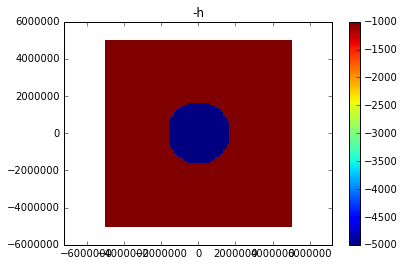

In [4]:
plt.pcolormesh(x,y,-h)
plt.axis('equal')
plt.title('-h')
plt.colorbar()

## Condición inicial (sup libre)

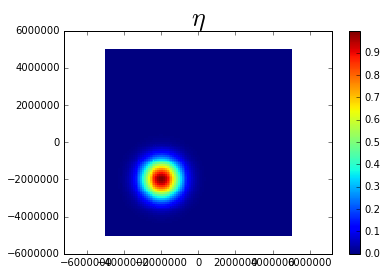

In [5]:
x0 = 0.3*x.min()+0.7*x.max()
y0 = 0.3*y.min()+0.7*y.max()
L = 0.1*(x.max()-x.min())
eta = np.zeros((nt,nx,ny))
eta[0,:,:] = np.exp(-((y+y0)**2+(x+x0)**2)/L**2) ##gaussian bell
eta[0,:,:] = np.where(h>=0,eta[0,:,:],-h)
plt.pcolormesh(x,y,eta[0,:,:])
plt.axis('equal')
plt.title(u'$\eta$',fontsize=26)
plt.colorbar()

In [6]:
p = np.zeros((nt,nx,ny))
q = np.zeros((nt,nx,ny))

In [7]:
cfl = 0.45
dx = np.diff(x.T)[0,0]
dy = np.diff(y)[0,0]
dt = cfl*min(dx,dy)/np.sqrt(np.max(h)*9.81)
rx = dt/dx
ry = dt/dy
gx = 1e-5
grx = 9.81*dt/dx
gry = 9.81*dt/dy

In [8]:
dt

205.2380186298775

In [9]:
grx,gry

(0.019932511131315094, 0.019932511131315094)

## Simulación

In [10]:
eta,p,q = simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx)

0.000 elapsed: 0.137 s, estimated 41.068 s:
0.003 elapsed: 0.232 s, estimated 34.846 s:
0.007 elapsed: 0.348 s, estimated 34.753 s:
0.010 elapsed: 0.450 s, estimated 33.723 s:
0.013 elapsed: 0.551 s, estimated 33.045 s:
0.017 elapsed: 0.655 s, estimated 32.762 s:
0.020 elapsed: 0.761 s, estimated 32.623 s:
0.023 elapsed: 0.880 s, estimated 33.011 s:
0.027 elapsed: 1.007 s, estimated 33.572 s:
0.030 elapsed: 1.116 s, estimated 33.494 s:
0.033 elapsed: 1.219 s, estimated 33.250 s:
0.037 elapsed: 1.342 s, estimated 33.549 s:
0.040 elapsed: 1.445 s, estimated 33.338 s:
0.043 elapsed: 1.548 s, estimated 33.167 s:
0.047 elapsed: 1.652 s, estimated 33.032 s:
0.050 elapsed: 1.753 s, estimated 32.877 s:
0.053 elapsed: 1.866 s, estimated 32.923 s:
0.057 elapsed: 1.964 s, estimated 32.736 s:
0.060 elapsed: 2.065 s, estimated 32.605 s:
0.063 elapsed: 2.168 s, estimated 32.521 s:
0.067 elapsed: 2.270 s, estimated 32.427 s:
0.070 elapsed: 2.373 s, estimated 32.364 s:
0.073 elapsed: 2.475 s, estimate

## Animación

Se ve bien la refracción, excepto por la condición de borde.

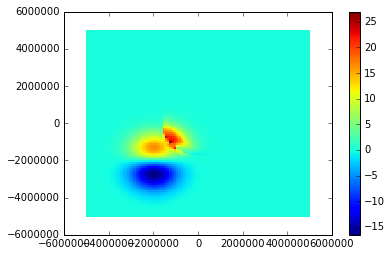

In [11]:
plt.pcolormesh(x,y,q[10,:,:])
plt.colorbar()


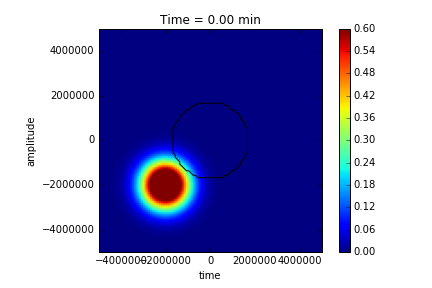
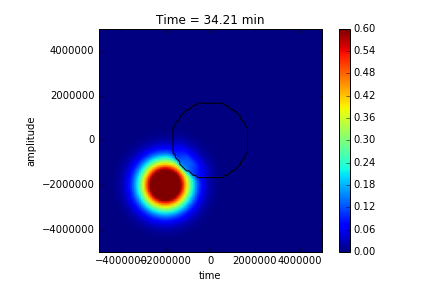
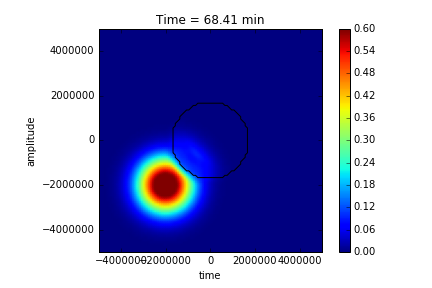
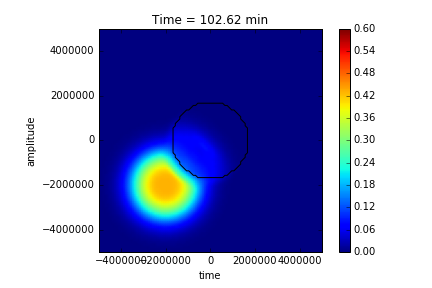
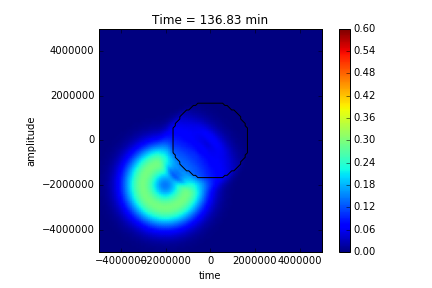
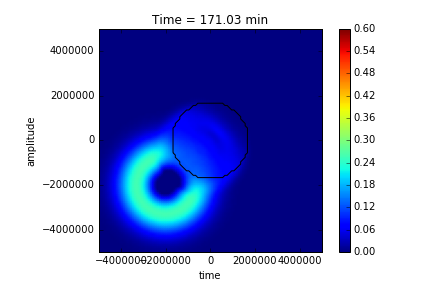
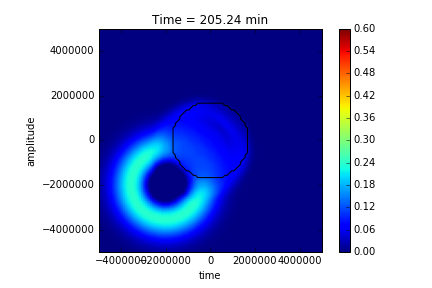
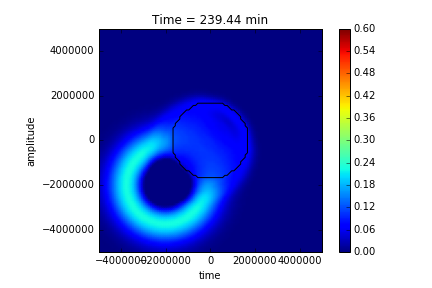
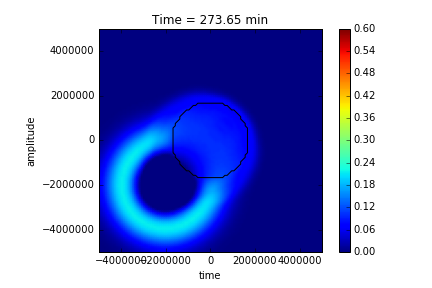
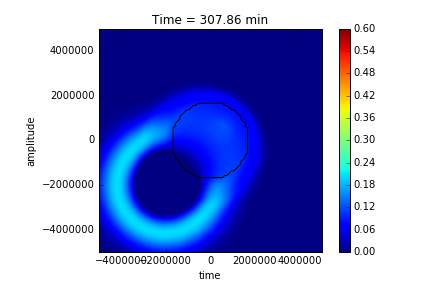
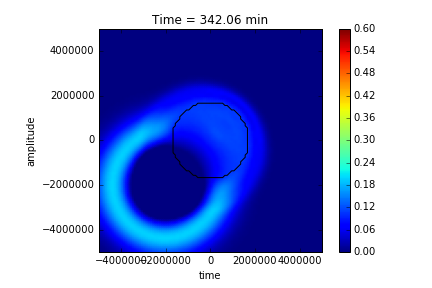
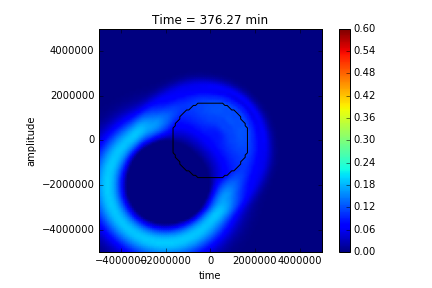
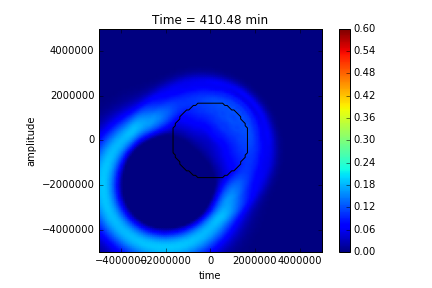
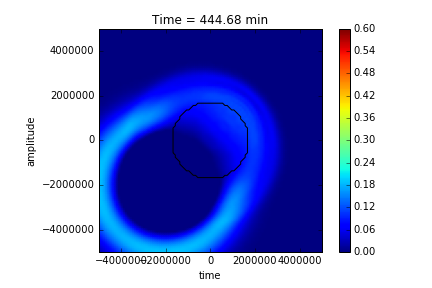
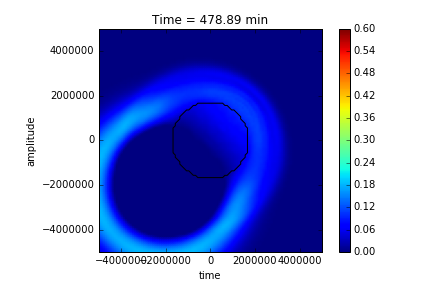
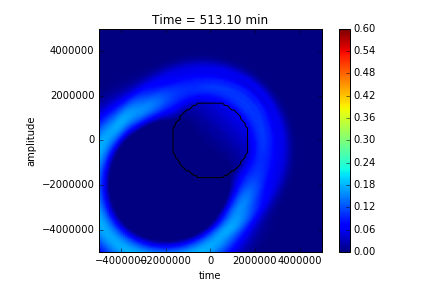
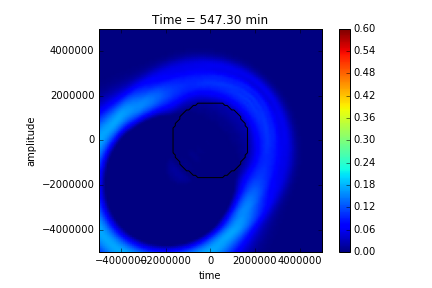
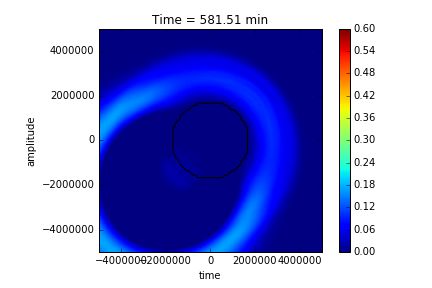
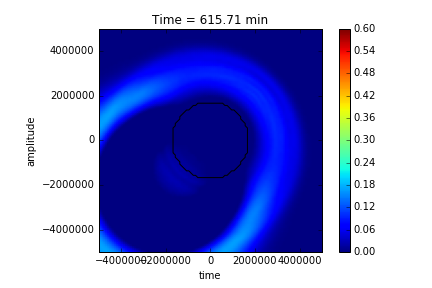
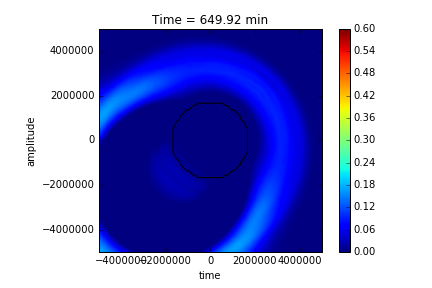

In [12]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(x,y,eta[0,:,:],shading='gouraud',vmax=0.6)
ax2.contour(x,y,h,[0.5*h.min(),h.min()],colors='k')
ax2.contour(x,y,h,[0.0],colors='w')
t = ax2.set_title('Time = %.2f min'%(0.0))

ax2.set_xlabel('time')
ax2.set_ylabel('amplitude')
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    j = min(i*10,299)
    t.set_text('Time = %.2f min'%(j*dt/60))
    quad1.set_array(eta[j,:,:].ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=20, interval=100)

In [14]:
print 'rx', rx
print 'ry',ry

rx 0.00203185638444
ry 0.00203185638444


In [18]:
print 'grxH vs R2', grx*h.min(),grx*h.max()
print 'gryH vs R4', gry*h.min(),gry*h.max()

grxH vs R2 19.9325111313 99.6625556566
gryH vs R4 19.9325111313 99.6625556566


In [17]:
dx

101010.10101010092